In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
import pickle
import gzip

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X, y = pickle.load(gzip.open('/content/drive/My Drive/flatland/flatland_train.data', 'rb'))
y[y != 0] -= 2
#X = X/255. for DNN

In [ ]:
# Augmentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=360,
        width_shift_range=0,
        height_shift_range=0,
        shear_range=0.3,
        zoom_range=0,
        horizontal_flip=True,
        fill_mode='nearest',
        vertical_flip=True
        )

In [ ]:
# X[1].shape
X = X.reshape(X.shape[0], 50, 50, 1)

In [ ]:
datagen.fit(X) # augmentation step2

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[50, 50]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(5, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D, MaxPool2D


model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=[50, 50, 1]))
model.add(BatchNormalization(axis=-1)) 
model.add(MaxPooling2D(pool_size=(2, 2))) #!
model.add(Dropout(0.12)) #!

#model.add(Activation("relu"))
#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(BatchNormalization(axis=-1))

#model.add(Activation("relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


#from keras.optimizers import Adam
opt = Adam(lr=3e-4) #0.001

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 256)      

In [ ]:
X = np.repeat(X[:,:,:],3, -1)/ 255. #.shape   
#np.repeat(X[:,:,:],3, -1).shape   

In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

In [ ]:
# Adding new trainable Dense layers
inputs = keras.layers.Input(shape=(50, 50, 3))
# # upsample??: (because less than 32,32)
#upsampled = keras.layers.UpSampling2D((2,2))(inputs)

embedding = vgg(inputs)
#embedding = mobile_net(upsampled)
output = keras.layers.Dense(64, activation='relu')(embedding)
# Output shape for sure is problem dependant, but this should give you the idea
output = keras.layers.Flatten()(embedding)
output = keras.layers.Dense(10, activation='softmax')(output)
# Build the model
model = keras.models.Model(inputs=inputs, outputs=output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam(lr=3e-4) #0.001

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [ ]:
loss = model.fit(X, y, epochs=18, batch_size = 128, validation_split=0.2)

Epoch 1/18
63/63 [==============================] - 3s 44ms/step - loss: 1.6007 - accuracy: 0.4002 - val_loss: 1.6042 - val_accuracy: 0.4130
Epoch 2/18
63/63 [==============================] - 2s 38ms/step - loss: 0.9786 - accuracy: 0.6129 - val_loss: 1.5286 - val_accuracy: 0.3115
Epoch 3/18
63/63 [==============================] - 2s 38ms/step - loss: 0.6575 - accuracy: 0.7287 - val_loss: 2.3498 - val_accuracy: 0.3240
Epoch 4/18
63/63 [==============================] - 2s 39ms/step - loss: 0.4521 - accuracy: 0.8084 - val_loss: 1.6733 - val_accuracy: 0.4075
Epoch 5/18
63/63 [==============================] - 2s 39ms/step - loss: 0.2782 - accuracy: 0.8919 - val_loss: 2.5359 - val_accuracy: 0.3855
Epoch 6/18
63/63 [==============================] - 2s 39ms/step - loss: 0.1910 - accuracy: 0.9246 - val_loss: 2.3061 - val_accuracy: 0.4565
Epoch 7/18
63/63 [==============================] - 2s 39ms/step - loss: 0.1288 - accuracy: 0.9523 - val_loss: 3.0692 - val_accuracy: 0.4185
Epoch 8/18
63

Accuracy on test set - 92.73%


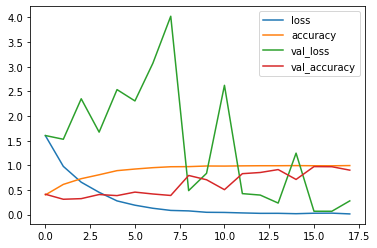

In [ ]:
pd.DataFrame(loss.history).plot()
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

In [ ]:
model.save('model.h5')

In [ ]:
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y, batch =16)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

## Teorija


https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb (The Complete Beginner’s Guide to Deep Learning: Convolutional Neural Networks and Image Classification)

https://theaisummer.com/skip-connections/ (skip connections)

 https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c (VGG16)

 https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/



-batch (standartinis modely pasleptas batch dydis yra 32) dense yr inputo dauginimas is matricos (bias termas uzsleptas - vienetas kuri reikia prideti)

-sparse reiskia kad tingiu konvertuot i one hot, rpochu gali buti bet kiek model fit i guess pasleptai maiso eilutes vietomis kiekvienai epochai

-galima keisti learing rate (sgd (ties compile), optimizer = SGD(learning_rate = 0.01 (standartinis, galima didinti gal)) optimizeriu yra ir kitu, pvz ADAMAS jei yra nestabilumu loss kreiveje, reik kaltinti learning rate arba dataseta

-bus budu, kaip padaryti modeli stabilesniu

-adamas keiciu learning rate, priklausomai nuo paklaidos dydzio (accuracy), ty is pradziu lr didelis, paskui mazina. taip pat, loss kreive greiciau krenta, bet greit overfittina, veliau bus kaip tvarkytis su tuo.

-is loss daznai lengviau skaityt kas vyksta su modeliu, nes pagal ji yra optimiz, isryskina paklaidas treniravimo metu.

-su daug sluoksniu atsirand avanishing gradient problema. pirmas sl sugers daugiausia paklaidos. o i gala su daugiausia parametru atkeliauja maziausiai inf apie paklaida kuri buvo padaryta gale. Su daugiua sluoksniu (10,100) pasimatytu vanish gr problema ir neitu treniruot modelio, butu prasta acccuracy. Veliau parodys triuku kaip susitvarkyt. pav ir kt. ten yra 40, 50sl ir pan--- triukai su skip conectoriais. velaiu dar mokys kaip padaryt kad modelis gerai generalizuotusi

-padidinus tripria svoriu/param kieki, modelis darosi galingesnis(LOTTERY TICKET STARPSNIS), mintis - daug neuronu 'numirsta' - tampa nuliais. sudinas modelis(sgd ir siaip paprastas) gereja su daug param.

-nenutrone ggalima pamatyt kaip inicijuoja svoriu ir jei idomu paskaityt

-overfito atveju - dropoutas. mintis - neuronai isimena inputo pav. nereik neuronu, kurie moka tik viena uzd. kur yra dense sluoksniu, veikia gerai, kai jau convoliuciniai - nebe. kai kurie neuronai isjungiami (neatnaujinami) vienam treniravimo etape, tada - kiti. dropoutas dedasi po sluoksniu (dense)

-learning rate, sluoksnui kiekis (64,32), dropout rate (tradiciskai pask - 0.2, retai kuris virs 0.5), optimizer,


yra ir learn2 # cia tik kitokia sintakse image = keras.layers.Input(Shape = 28,28) out = keras.layers.Flatten()(image)

skip_1 = keras.layers.Dense(50, activation = 'relu')(out) out = keras.layers.Dense(50, activation = 'relu')(skip_1) out = keras.layers.Dense(50, activation = 'relu')(out)

skip_2 = keras.layers.Dense(50, activation = 'relu')(out) out = keras.layers.Dense(50, activation = 'relu')(skip_2) out = keras.layers.Dense(50, activation = 'relu')(out)

out = keras.layers.Dense(10, activation = 'softmax')(out) model = keras.models.Model(inputs = image, outputs = out)

model.compile(loss = '')

-CNN
Filtras: (teoriskai)
mazyte matrica, kuria stumiam per paveiksliuka ri gaunam dot produkta.
ir ta verte kuria gaunam irasom
einam per eilutes iri stulpelius (tam yra for ciklai funkcijoje, kuria jis parase) 


(norint islaikyti forma (kad nemazetu) reikia sonuose paddinga ('valid', 'same') padaryt(prideti tusciu eil ir stulp)), svoriai sumuojasi i vieneta ar nuli

conv = Conv2D(filters=1, kernel_size=(3, 3), padding='VALID') # konvoliucija, vertes nustatomos randomly, 
conv(X[np.newaxis, :, :, np.newaxis].astype('float32')).shape   #pridedam asis (), nes vienas pav, gale 1 , nes grayscale 1 verte (rgb-3)

- input_shape = vienetas svarbus nes pav turi sluoksnius (spalvas?), galimai duosim sluoksni, kuris reshapina
- naudojant adama gerai nurodyt learning rate -  lr = 3e-4  

- ideti subsamplinga? - max pooling sutarukia
- batch normalizacija  - leidzia isvengti exploding gradient problemos; gerai po konvoliuciju pries dense ; tarp dense dropoutas (retai dedamas tarp konvoliuciju , bet dropout ir batch norm beveik tas pats tik antras greitesnis)

- yra dar viena nuoroda kaip su tenserboardu

- data augmentation??? uuuuh fancy

- nupjausim ties konvoliuciniu tinklu pa baiga
- Kartais apsimoka kuri laika gala treniruot  otik tada visa

-vgg = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))
- arba
- mobile_net = keras.applications.MobileNet(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

-gala reik nupjauti ir padaryt 10 outputu

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


X_train = np.repeat(X_train[:,:,:, np.newaxis],3, -1)/ 255. #.shape   # glaimai reikia pirma atimti vidurki ir tik tada dalinti
X_test = np.repeat(X_test[:,:,:, np.newaxis],3, -1)/ 255.

vgg = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(56, 56, 3))

- Let's fix those weights
for layer in vgg.layers:
    layer.trainable = False
    
- Adding new trainable Dense layers
inputs = keras.layers.Input(shape=(28, 28, 3))
- upsample??: (because less than 32,32)
upsampled = keras.layers.UpSampling2D((2,2))(inputs)

-embedding = vgg(inputs)embedding = vgg(inputs)
-embedding = mobile_net(upsampled)
output = keras.layers.Dense(42, activation='relu')(embedding)
- Output shape for sure is problem dependant, but this should give you the idea
output = keras.layers.Dense(10, activation='softmax')(output)
- Build the model
model = keras.models.Model(inputs=inputs, outputs=output)
model.summary()